# Bank Marketing Term Deposit Subcription

* The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

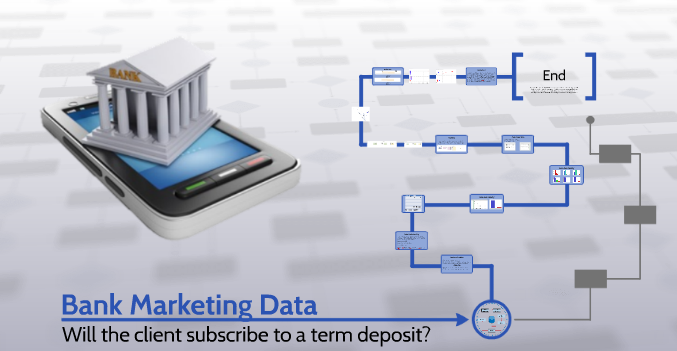

## Importing the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the datasets using pandas and view part of the data

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [3]:
cols = []
for col in df.columns:
    cols.append(col.replace('.','_'))
df.columns = cols

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe() #shows the details of the numerical features

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info() #datatypes and checking missing values in all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
columns = df.columns

In [8]:
unique_v = {}
for col in columns:
    unique_v[col] = df[col].unique()
unique_v.keys()
unique_v

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64),
 'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=obje

In [9]:
unique_v['previous'] #shows the unique values in column named previous

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [10]:
['job','marital','education','default','housing','loan','poutcome','']

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', '']

In [11]:
(df=='unknown').astype('int').sum() #here "unknown" is the missing data, checking the number of unknown in each column

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [12]:
(df=='nonexistent').astype('int').sum() #to confirm if "nonexistent" is also a missing value or not

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
y                     0
dtype: int64

In [13]:
(df['previous']>= 6).astype('int').sum()

6

In [14]:
df.describe() #notice that pdays column 25,50,75 percentile and max is same value, in that case it will be removed from our feature

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df['cons_conf_idx'] #consumer confidence index

0       -36.4
1       -36.4
2       -36.4
3       -36.4
4       -36.4
         ... 
41183   -50.8
41184   -50.8
41185   -50.8
41186   -50.8
41187   -50.8
Name: cons_conf_idx, Length: 41188, dtype: float64

In [17]:
df['cons_price_idx'].unique() #consumer price index

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

(array([ 4176.,  9515.,  2292.,     0.,  6045.,  5243.,     0.,  1731.,
        12168.,    18.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

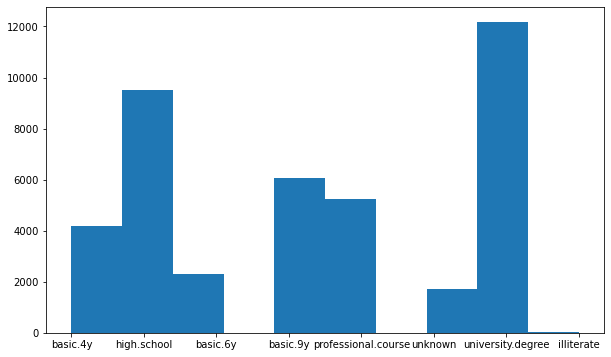

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df.education)

(array([ 5029., 10422.,  9254.,  6743.,  1720.,  2924.,  1014.,  1421.,
          330.,  2331.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

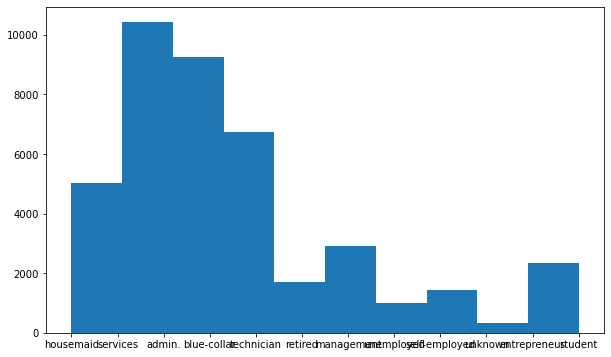

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df.job)

(array([24928.,     0.,     0., 11568.,     0.,     0.,  4612.,     0.,
            0.,    80.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

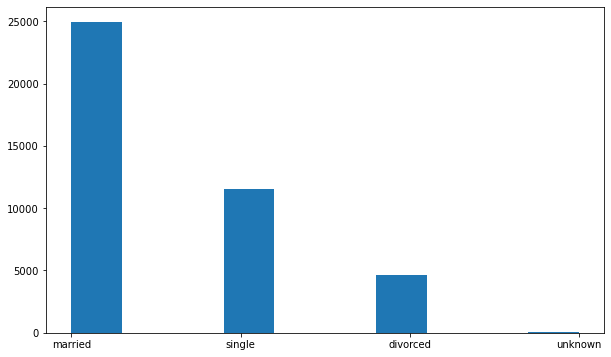

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df.marital)

(array([13769.,  5318.,  7174.,  6178.,   718.,  4101.,   182.,   546.,
         2632.,   570.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

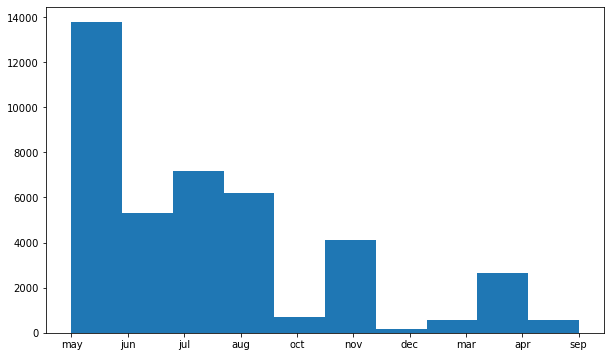

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df.month)

In [22]:
(df.month == 'mar').astype('int').sum()

546

(array([8514.,    0., 8090.,    0.,    0., 8134.,    0., 8623.,    0.,
        7827.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

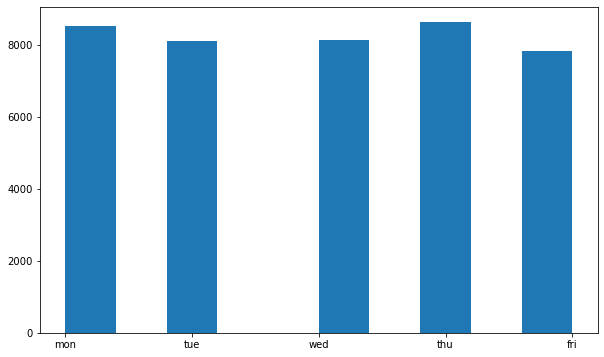

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df.day_of_week)

(array([3.5563e+04, 4.5610e+03, 7.5400e+02, 0.0000e+00, 2.1600e+02,
        7.0000e+01, 0.0000e+00, 1.8000e+01, 5.0000e+00, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

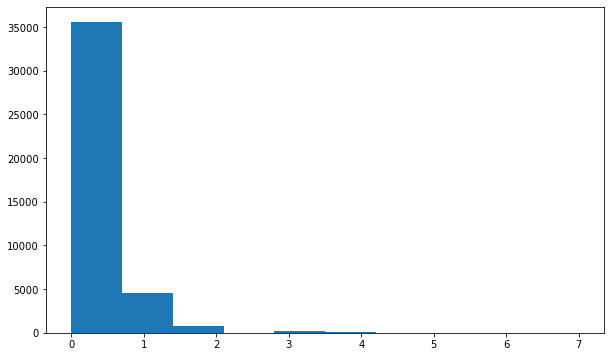

In [24]:
plt.figure(figsize=(10,6))
plt.hist(df.previous)

### Slicing out Dataset to be used for the model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [26]:
features = ['age','marital','education','default','housing','loan','contact','month','day_of_week','campaign','previous','emp_var_rate','cons_price_idx','euribor3m' , 'nr_employed', 'y']

In [27]:
new_df = df[features]

> spliting the datasets into train and test

In [28]:
df_full_train, df_test = train_test_split(new_df,test_size=0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [29]:
df_train.shape[0],df_val.shape[0],df_test.shape[0]

(24712, 8238, 8238)

### Working on the Features and Target value

In [30]:
df_train['y'].value_counts() #checking the value counts

no     21954
yes     2758
Name: y, dtype: int64

In [31]:
df_val['y'].value_counts()

no     7300
yes     938
Name: y, dtype: int64

In [32]:
df_test['y'].value_counts()

no     7294
yes     944
Name: y, dtype: int64

In [33]:
df_train = df_train.reset_index(drop=True) # resetting the index values for the train, val and test dataframe
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = (df_train['y'] == 'no').astype('int').values #slicing out the target value
y_val = (df_val['y'] == 'no').astype('int').values
y_test = (df_test['y'] == 'no').astype('int').values

In [35]:
df_train = df_train.drop('y',axis=1) #dropping the target value from the rest of the dataframe
df_val = df_val.drop('y',axis=1)
df_test = df_test.drop('y',axis=1)

In [36]:
df_train = df_train.replace('unknown',np.nan) #replacing the "unknown" value with NaN
df_val = df_val.replace('unknown',np.nan)
df_test = df_test.replace('unknown',np.nan)

In [37]:
(df_train.fillna(method='bfill',limit=20).isnull()).astype('int').sum() #dealing with NaN value

age               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
emp_var_rate      0
cons_price_idx    0
euribor3m         0
nr_employed       0
dtype: int64

In [38]:
df_test['default']

0       NaN
1       NaN
2        no
3        no
4        no
       ... 
8233     no
8234    NaN
8235     no
8236    NaN
8237     no
Name: default, Length: 8238, dtype: object

In [39]:
df_train = df_train.fillna(method='bfill',limit=20) #using backwards fill to deal with missing values

In [40]:
train_dict = df_train.to_dict(orient='records') #Performing Dictvector transform
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_train

array([[3.6000e+01, 1.0000e+00, 9.2893e+01, ..., 0.0000e+00, 5.0991e+03,
        0.0000e+00],
       [2.5000e+01, 1.0000e+00, 9.4199e+01, ..., 1.0000e+00, 4.9636e+03,
        0.0000e+00],
       [2.8000e+01, 2.0000e+00, 9.3075e+01, ..., 0.0000e+00, 5.0991e+03,
        0.0000e+00],
       ...,
       [3.4000e+01, 1.0000e+00, 9.3075e+01, ..., 0.0000e+00, 5.0991e+03,
        1.0000e+00],
       [4.6000e+01, 1.0000e+00, 9.3075e+01, ..., 0.0000e+00, 5.0991e+03,
        0.0000e+00],
       [3.9000e+01, 1.0000e+00, 9.3200e+01, ..., 0.0000e+00, 5.1958e+03,
        0.0000e+00]])

In [41]:
def dict_transform(df):    #function to handle missing value and Dictvector transform
    df = df.fillna(method='bfill',limit=20)
    df_dict = df.to_dict(orient='records')
    new_df = dv.transform(df_dict)
    return new_df

In [42]:
X_val = dict_transform(df_val)

## Building XGBoost Model Using XGBRegressor
* installing and importing xgboost libraries
* Building xgboost model
* Tuning the parameters to find the best model
* Choosing the Best model

In [43]:
!pip install xgboost --quiet 

In [44]:
from xgboost import XGBRegressor

* max_depth
* learning_rate
* n_estimators
* n_jobs
* min_child_weight

In [45]:
#performing parameter tuning on xgbregressor
scores = []

for d in [5,10,15]:
    for n in [100,150,200]:
        for j in [1,5,10,20,30,50]:
            xgb_model = XGBRegressor(learning_rate= 0.01,random_state=1,verbosity=0, n_jobs=j,n_estimators=n,max_depth=d,min_child_weight=5)
            xgb_model.fit(X_train, y_train)

            y_pred = xgb_model.predict(X_val)
            auc = roc_auc_score(y_val,y_pred)
            scores.append((d,n,j, auc))
df_scores = pd.DataFrame(scores,columns=['max_depth','n_est','n_jobs','auc'])
df_scores.head()

,max_depth,n_est,n_jobs,auc
0,5,100,1,0.786087
1,5,100,5,0.786087
2,5,100,10,0.786087
3,5,100,20,0.786087
4,5,100,30,0.786087


<AxesSubplot:xlabel='n_jobs', ylabel='max_depth-n_est'>

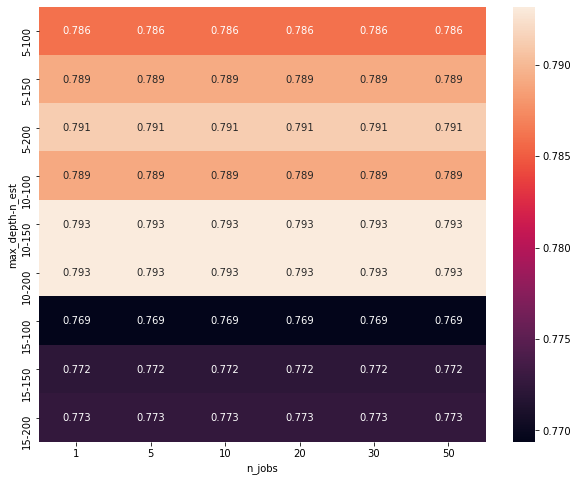

In [46]:
#plotting  heatmap
df_pivot = df_scores.pivot(index=['max_depth','n_est'],columns='n_jobs',values='auc')
plt.figure(figsize=(10,8))
sns.heatmap(df_pivot,annot=True,fmt='.3f')

In [47]:
scores = []

for n in [100,150,200]:
    for mc in [1,5,10,20,30]:
        xgb_model = XGBRegressor(learning_rate= 0.01,random_state=1,verbosity=0, n_jobs=10,n_estimators=n,max_depth=10,min_child_weight=mc)
        xgb_model.fit(X_train, y_train)

        y_pred = xgb_model.predict(X_val)
        auc = roc_auc_score(y_val,y_pred)
        scores.append((n,mc, auc))
df_scores = pd.DataFrame(scores,columns=['n_est','min_weight','auc'])
df_scores.head()

,n_est,min_weight,auc
0,100,1,0.784733
1,100,5,0.789100
2,100,10,0.791237
3,100,20,0.791115
4,100,30,0.792091


<AxesSubplot:xlabel='min_weight', ylabel='n_est'>

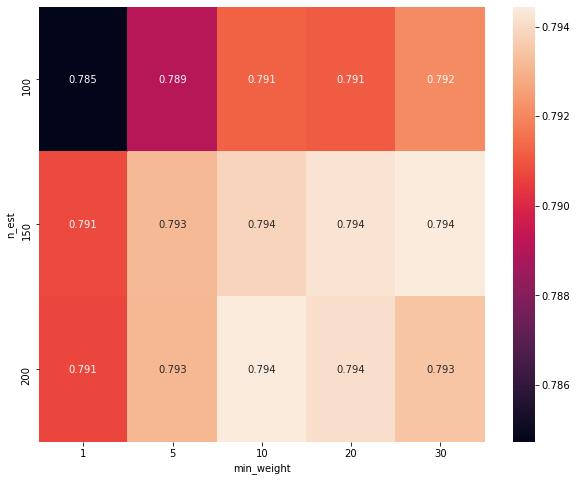

In [48]:
df_pivot = df_scores.pivot(index='n_est',columns='min_weight',values='auc')
plt.figure(figsize=(10,8))
sns.heatmap(df_pivot,annot=True,fmt='.3f')

### Best Model Using XGBRegressor

In [49]:
xgb_model = XGBRegressor(learning_rate= 0.01,random_state=1,verbosity=0, n_jobs=10,n_estimators=150,max_depth=10,min_child_weight= 10)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [50]:
y_pred = xgb_model.predict(X_val)
roc_auc_score(y_val,y_pred)

0.7938290446008704

## Building Model Using XGBoost
* installing and importing xgboost libraries
* Building xgboost model
* Tuning the parameters to find the best model
* Choosing the Best model
* Cross validation

In [51]:
import xgboost as xgb #xgb is an alias

#### Feature Matrix

In [52]:
feature_names = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train,feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val,feature_names=feature_names)

In [53]:
#Parameters
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'nthread': 8,
    

    'seed':1,
    'verbosity' : 1
}

model = xgb.train(xgb_params,dtrain,num_boost_round=10)

[12:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
y_pred = model.predict(dval)

In [55]:
auc = roc_auc_score(y_val,y_pred)
print(auc)

0.7922439173993049


## XGB Parameter Tuning
* eta('learning_rate')
* max_depth
* min_child_weight

In [56]:
watchlist = [(dtrain, 'train'), (dval,'val')]

In [57]:
%%capture output

xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight' : 1,
    

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread': 8,
    

    'seed':1,
    'verbosity' : 1
}

model = xgb.train(xgb_params,dtrain,num_boost_round=200,verbose_eval=5, evals=watchlist)

In [58]:
s = output.stdout

In [59]:
s

'[0]\ttrain-auc:0.78834\tval-auc:0.77590\n[5]\ttrain-auc:0.80811\tval-auc:0.78641\n[10]\ttrain-auc:0.82803\tval-auc:0.79246\n[15]\ttrain-auc:0.84188\tval-auc:0.79828\n[20]\ttrain-auc:0.85165\tval-auc:0.79512\n[25]\ttrain-auc:0.85539\tval-auc:0.79514\n[30]\ttrain-auc:0.86117\tval-auc:0.79383\n[35]\ttrain-auc:0.86662\tval-auc:0.79255\n[40]\ttrain-auc:0.87143\tval-auc:0.79101\n[45]\ttrain-auc:0.87779\tval-auc:0.79132\n[50]\ttrain-auc:0.88170\tval-auc:0.78935\n[55]\ttrain-auc:0.88368\tval-auc:0.78825\n[60]\ttrain-auc:0.88615\tval-auc:0.78942\n[65]\ttrain-auc:0.89092\tval-auc:0.78931\n[70]\ttrain-auc:0.89413\tval-auc:0.78751\n[75]\ttrain-auc:0.89872\tval-auc:0.78500\n[80]\ttrain-auc:0.90148\tval-auc:0.78383\n[85]\ttrain-auc:0.90384\tval-auc:0.78394\n[90]\ttrain-auc:0.90562\tval-auc:0.78290\n[95]\ttrain-auc:0.91048\tval-auc:0.78059\n[100]\ttrain-auc:0.91580\tval-auc:0.77698\n[105]\ttrain-auc:0.91692\tval-auc:0.77589\n[110]\ttrain-auc:0.91884\tval-auc:0.77549\n[115]\ttrain-auc:0.92109\tval-au

In [60]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [61]:
df_score = parse_xgb_output(output)

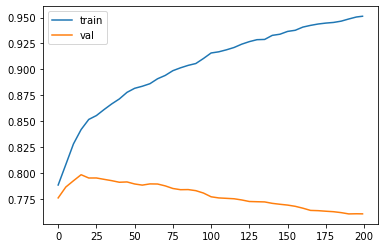

In [62]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

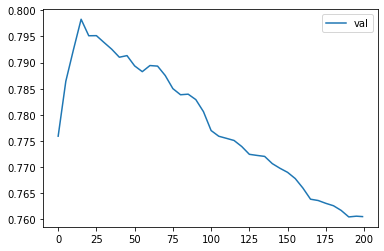

In [63]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

#### Tune Parameters
    * eta

In [64]:
scores = {}

In [75]:
%%capture output

xgb_params = {
    'eta': 1,
    'max_depth':6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread': 8,
    

    'seed':1,
    'verbosity' : 1
}

model = xgb.train(xgb_params,dtrain,num_boost_round=200,verbose_eval=5, evals=watchlist)

In [76]:
key = 'eta=%s'%(xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1'

In [77]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=1'])

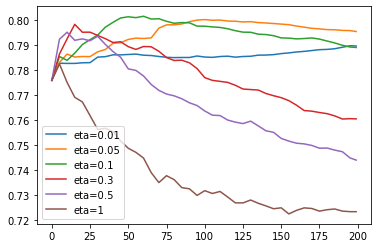

In [78]:
for key in scores.keys():
#     print(scores[key])
    df_try = pd.DataFrame(scores[key])
    plt.plot(df_try.num_iter, df_try.val_auc,label = key)
plt.legend()

#### Tune Parameters
    * max_depth
    

In [79]:
scores = {}

In [88]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth':10,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread': 8,
    

    'seed':1,
    'verbosity' : 1
}

model = xgb.train(xgb_params,dtrain,num_boost_round=200,verbose_eval=5, evals=watchlist)

In [89]:
key = 'max_depth=%s'%(xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

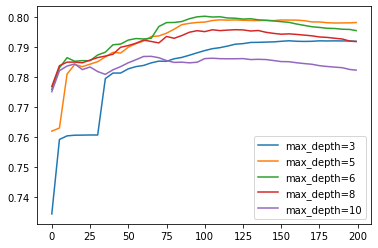

In [90]:
for key in scores.keys():
#     print(scores[key])
    df_try = pd.DataFrame(scores[key])
    plt.plot(df_try.num_iter, df_try.val_auc,label = key)
plt.legend()

#### Tune Parameters
    * min_child -weight

In [91]:
scores = {}

In [100]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight' : 20,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread': 8,
    

    'seed':1,
    'verbosity' : 1
}

model = xgb.train(xgb_params,dtrain,num_boost_round=200,verbose_eval=5, evals=watchlist)

In [101]:
key = 'min_weight=%s'%(xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_weight=20'

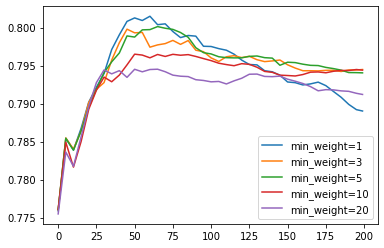

In [102]:
for key,df_try in scores.items():
#     print(scores[key])
    plt.plot(df_try.num_iter, df_try.val_auc,label = key)
plt.legend()

## Fitting Best Model

In [103]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    
    'nthread': 8,
    'seed':1,
    'verbosity' : 1
}

model = xgb.train(xgb_params,dtrain,num_boost_round=50)

In [104]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.801191547156585

## Cross Validation using Kfold

In [105]:
df_full_train.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,emp_var_rate,cons_price_idx,euribor3m,nr_employed,y
32694,30,married,basic.6y,unknown,yes,no,cellular,may,mon,1,0,-1.8,92.893,1.299,5099.1,no
39374,58,married,high.school,no,yes,no,telephone,mar,mon,4,0,-1.8,93.369,0.635,5008.7,no
13543,32,divorced,basic.9y,no,no,no,cellular,jul,thu,1,0,1.4,93.918,4.963,5228.1,no
37649,26,single,university.degree,no,yes,no,telephone,aug,tue,1,1,-2.9,92.201,0.859,5076.2,yes
13150,48,married,basic.4y,no,yes,no,cellular,jul,wed,1,0,1.4,93.918,4.962,5228.1,no


In [106]:
df_full_train = df_full_train.reset_index(drop=True)

In [107]:
(df_full_train.y == 'no').astype('int').values

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
df_full_train = df_full_train.fillna(method='bfill',limit=20)

In [109]:
df_full_train.y.values

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [110]:
features.pop()
new_f = features
new_f

['age',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'euribor3m',
 'nr_employed']

In [111]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [112]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [113]:
t_i, v_i = next(kfold.split(df_full_train))


In [114]:
def train(df_train,y_train):
    train_dict = df_train[new_f].to_dict(orient='records')
    dv = DictVectorizer(sparse = False)
    x_train = dv.fit_transform(train_dict)
    
    feature_names = dv.get_feature_names()
    dtrain = xgb.DMatrix(x_train, label=y_train,feature_names=feature_names)
    
    xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    
    'nthread': 8,
    'seed':1,
    'verbosity' : 1
    }
    
    xgbmodel = xgb.train(xgb_params,dtrain,num_boost_round=50)
    return dv, xgbmodel

In [115]:
def predict(df,dv,model,y_val):
    df_dict = df[new_f].to_dict(orient='records')
    X = dv.transform(df_dict)
    
    feature_names = dv.get_feature_names()
    dval = xgb.DMatrix(X, label=y_val,feature_names=feature_names)
    
    y_pred = model.predict(dval)
    return y_pred

In [116]:
xgb_scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = (df_train.y == 'no').astype('int').values
    y_val = (df_val.y == 'no').astype('int').values
    
    dv, xgbmodel = train(df_train,y_train)
    y_pred = predict(df_val,dv,xgbmodel,y_val)
    auc = roc_auc_score(y_val, y_pred)
    xgb_scores.append(auc)    

In [117]:
xgb_scores

[0.8165013491645375,
 0.7898457537343879,
 0.784470282189225,
 0.7994376535245968,
 0.7937500716822583,
 0.7891704021119783,
 0.8101705526770294,
 0.8147712955302726,
 0.7978272671812122,
 0.7981063733575968]

In [118]:
np.mean(xgb_scores)

0.7994051001153095

## Saving the model

In [119]:
dv_xgb, xgbmodel = train(df_train,y_train)

In [120]:
pd.to_pickle((dv_xgb,xgbmodel),'xgb_model.bin')

## Reading the model

In [121]:
dv_xgb, xgbmodel1 = pd.read_pickle('xgb_model.bin')

In [122]:
y_pred = predict(df_val,dv_xgb,xgbmodel1,y_val)
auc = roc_auc_score(y_val, y_pred)

In [123]:
auc

0.7981063733575968

## Making Predictions with the model

In [124]:
profile = {}
for f in new_f:
    profile[f] = ""

In [129]:
profile = {"age": 40,
    "marital": "married",
    "education": "university.degree",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "oct",
    "day_of_week": "fri",
    "campaign": 3,
    "previous": 1,
    "emp.var.rate": 1,
    "cons.price.idx": 93.45,
    "euribor3m": 2.567,
    "nr.employed": 5567
    }

In [130]:
profile['euribor3m'] = 4.567

In [131]:
profile

{'age': 40,
 'marital': 'married',
 'education': 'university.degree',
 'default': 'no',
 'housing': 'yes',
 'loan': 'no',
 'contact': 'cellular',
 'month': 'oct',
 'day_of_week': 'fri',
 'campaign': 3,
 'previous': 1,
 'emp.var.rate': 1,
 'cons.price.idx': 93.45,
 'euribor3m': 4.567,
 'nr.employed': 5567}

In [132]:
Xy = dv_xgb.transform([profile])

In [133]:
dval = xgb.DMatrix(Xy, feature_names=dv_xgb.get_feature_names())
xgbmodel1.predict(dval)

array([0.5566224], dtype=float32)